<a href="https://colab.research.google.com/github/Jubayer934/Deep-Fake-Detection/blob/main/DFD_Vit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nbformat

# Path to your current notebook file
input_path = "/content/drive/MyDrive/ModelTrain/DFD/Colab/Hybrid_XcepVit.ipynb"
output_path = "/content/drive/MyDrive/ModelTrain/DFD/Colab/Hybrid_XcepVit1.ipynb"

# Load the notebook
with open(input_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Remove the problematic widget metadata
if "widgets" in nb.get("metadata", {}):
    del nb["metadata"]["widgets"]

# Save the cleaned notebook
with open(output_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("Cleaned notebook saved as:", output_path)

In [ ]:
# import zipfile
# import os

# # Path to the zip file in Drive
# zip_path = "/content/drive/MyDrive/ModelTrain/DFD/Dataset/DFD.zip"

# # Unzip it to /content/
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall("/content/deepfake_dataset")

# # Set dataset path
# dataset_path = "/content/deepfake_dataset"

In [ ]:
import zipfile
import os

# Path to the zip file in Drive
zip_path = "/content/drive/MyDrive/ModelTrain/DFD/Dataset/extract_frames.zip"

# Unzip it to /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/deepfake_dataset")

# Set dataset path
dataset_path = "/content/deepfake_dataset"

In [ ]:
# import os

# # List top-level files/folders
# print(os.listdir("/content/deepfake_dataset"))

# # If it's nested, explore further:
# for root, dirs, files in os.walk("/content/deepfake_dataset"):
#     print("Root:", root)
#     print("Dirs:", dirs)
#     print("Files:", files[:5])  # just print the first 5 files
#     print("===")

In [ ]:
!pip install opencv-python

In [ ]:
# import cv2
# import os

# # Function to count readable videos in a directory
# def count_readable_videos(directory):
#     video_files = [f for f in os.listdir(directory) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     readable_count = 0
#     for video_file in video_files:
#         video_path = os.path.join(directory, video_file)
#         cap = cv2.VideoCapture(video_path)
#         if cap.isOpened():
#             readable_count += 1
#             cap.release()
#     return readable_count

# # Count readable videos in each directory
# real_videos_dir = "/content/deepfake_dataset/DFD/DFD_original sequences"
# manipulated_videos_dir = "/content/deepfake_dataset/DFD/DFD_manipulated_sequences"

# real_readable_count = count_readable_videos(real_videos_dir)
# manipulated_readable_count = count_readable_videos(manipulated_videos_dir)

# print(f"Number of readable real videos: {real_readable_count}")
# print(f"Number of readable manipulated videos: {manipulated_readable_count}")

## Step 1: Install Required Libraries




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
!pip install timm

In [ ]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import timm
from PIL import Image

## Device

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

Using device: cuda


## Extracted Frames

In [ ]:
# # Directories for real and manipulated videos
# real_videos_dir = "/content/deepfake_dataset/DFD/DFD_original sequences"
# manipulated_videos_dir = "/content/deepfake_dataset/DFD/DFD_manipulated_sequences"

# # Output directories for extracted frames
# output_real_dir = "/content/deepfake_dataset/extract_frames/real"
# output_manipulated_dir = "/content/deepfake_dataset/extract_frames/manipulated"

In [ ]:
# # Ensure output directories exist
# os.makedirs(output_real_dir, exist_ok=True)
# os.makedirs(output_manipulated_dir, exist_ok=True)

##  Extract Frames from video

---



In [ ]:
# def extract_frames_from_videos(videos_dir, output_dir, label, interval_sec=2):
#     video_files = [f for f in os.listdir(videos_dir) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     total_videos = len(video_files)

#     for idx, video_file in enumerate(video_files):
#         idx += 1
#         if idx == 1:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")
#         elif idx%100==0:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")
#         elif idx == total_videos:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")

#         video_path = os.path.join(videos_dir, video_file)
#         cap = cv2.VideoCapture(video_path)
#         fps = int(cap.get(cv2.CAP_PROP_FPS))
#         total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#         if fps <= 0:
#             print(f"⚠️ Skipping {video_file} (FPS not detected)")
#             continue

#         # Step size in frames
#         step = fps * interval_sec

#         frame_num = 0
#         while frame_num < total_frames:
#             cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)  # jump directly
#             success, image = cap.read()
#             if not success:
#                 break

#             frame_filename = f"{label}_{video_file}_frame{frame_num // step}.jpg"
#             frame_path = os.path.join(output_dir, frame_filename)
#             cv2.imwrite(frame_path, image)

#             frame_num += step  # jump to next interval

#         cap.release()

#     print(f"✅ Finished extracting frames every {interval_sec}s from {label} videos.")


In [ ]:
# def extract_frames_from_videos_with_every_fps(videos_dir, output_dir, label):
#     video_files = [f for f in os.listdir(videos_dir) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     total_videos = len(video_files)

#     for idx, video_file in enumerate(video_files):
#         print(f"[{idx + 1}/{total_videos}] Processing: {video_file}")

#         video_path = os.path.join(videos_dir, video_file)
#         cap = cv2.VideoCapture(video_path)
#         frame_count = 0
#         success, image = cap.read()

#         while success:
#             if frame_count % int(cap.get(cv2.CAP_PROP_FPS)) == 0:
#                 frame_filename = f"{label}_{video_file}_frame{frame_count // int(cap.get(cv2.CAP_PROP_FPS))}.jpg"
#                 frame_path = os.path.join(output_dir, frame_filename)
#                 cv2.imwrite(frame_path, image)
#             success, image = cap.read()
#             frame_count += 1

#         cap.release()

#     print(f"✅ Finished extracting frames from {label} videos.")

In [ ]:
# extract_frames_from_videos(real_videos_dir, output_real_dir, "real")
# extract_frames_from_videos(manipulated_videos_dir, output_manipulated_dir, "manipulated")
# print("Frame extraction completed.")

In [ ]:
import os

real_frames_dir = "/content/deepfake_dataset/extract_frames/real"
num_real_frames = len([f for f in os.listdir(real_frames_dir) if os.path.isfile(os.path.join(real_frames_dir, f))])
print(f"Number of frames in {real_frames_dir}: {num_real_frames}")

manipulated_dir = "/content/deepfake_dataset/extract_frames/manipulated"
num_manipulated_frames = len([f for f in os.listdir(manipulated_dir) if os.path.isfile(os.path.join(manipulated_dir, f))])
print(f"Number of frames in {manipulated_dir}: {num_manipulated_frames}")

Number of frames in /content/deepfake_dataset/extract_frames/real: 6750
Number of frames in /content/deepfake_dataset/extract_frames/manipulated: 48235


## Transformations

In [ ]:
# Define image transformations with advanced augmentations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

## Train and Validation Load

In [ ]:
import os
import multiprocessing
import torch

def system_info():
    # CPU cores
    cpu_count = multiprocessing.cpu_count()
    print(f"Total CPU cores: {cpu_count}")

    # GPU info (if PyTorch + CUDA available)
    if torch.cuda.is_available():
        gpu_count = torch.cuda.device_count()
        print(f"Total GPUs: {gpu_count}")
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("No GPU detected.")

    # Recommended DataLoader workers
    # Rule of thumb: num_workers = number of CPU cores // number of GPUs (if GPUs exist), or just half of CPU cores
    if torch.cuda.is_available():
        recommended_workers = max(1, cpu_count // torch.cuda.device_count())
    else:
        recommended_workers = max(1, cpu_count // 2)

    print(f"Recommended DataLoader workers: {recommended_workers}")

system_info()

Total CPU cores: 2
Total GPUs: 1
GPU 0: Tesla T4
Recommended DataLoader workers: 2


In [ ]:
dataset_dir = "/content/deepfake_dataset/extract_frames"  # Directory where frames are saved

In [ ]:
# --------------------------
# Set random seeds for reproducibility
# --------------------------
import random # Import the random module
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Load full dataset with training transforms (we will override val later)
full_dataset = datasets.ImageFolder(root=dataset_dir, transform=transform_train)

In [ ]:
# Extract indices and labels for stratified split
indices = list(range(len(full_dataset)))
labels = full_dataset.targets  # already a list of labels in ImageFolder

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
# Train/Validation split (stratified, reproducible)
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    stratify=labels,
    random_state=seed   # ensures same split every run
)

In [ ]:
# Subsets
train_dataset = Subset(full_dataset, train_idx)
val_dataset = Subset(full_dataset, val_idx)

In [ ]:
# Override validation dataset transform
val_dataset.dataset.transform = transform_val

In [ ]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
# Class label map
label_map = full_dataset.class_to_idx
print("✅ Classes:", label_map)
print(f"📂 Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")

✅ Classes: {'manipulated': 0, 'real': 1}
📂 Train samples: 43988, Val samples: 10997


In [ ]:
print(f"📦 Number of batches in train_loader: {len(train_loader)}")
print(f"📦 Number of batches in val_loader: {len(val_loader)}")

📦 Number of batches in train_loader: 5499
📦 Number of batches in val_loader: 1375


## Load ViT and train the model and Save the best model at drive

In [ ]:
save_path = '/content/drive/MyDrive/ModelTrain/DFD/Model/best_vit_model.pth'

In [ ]:
# Load Vision Transformer (ViT) model
model = timm.create_model('vit_large_patch16_224.orig_in21k', pretrained=True, num_classes=2)
model.to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1024, out_features=3072, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=1024, out_features=1024, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplac

In [ ]:
# # Load Vision Transformer (ViT) model
# model = timm.create_model('vit_large_patch16_224', pretrained=True, num_classes=2)
# model.to(device)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from tqdm import tqdm
import os

# =====================
# Loss, Optimizer, Scheduler
# =====================
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# =====================
# Training Settings
# =====================
num_epochs = 10
patience = 5
patience_counter = 0

# Metric storage
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Reverse label map
idx_to_class = {v: k for k, v in label_map.items()}

# =====================
# Checkpoints
# =====================
checkpoint_dir = "/content/drive/MyDrive/ModelTrain/DFD/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
latest_ckpt = os.path.join(checkpoint_dir, "last_checkpoint.pth")

# =====================
# Resume Training if Checkpoint Exists
# =====================
start_epoch = 0
best_val_accuracy = 0.0

if os.path.exists(latest_ckpt):
    checkpoint = torch.load(latest_ckpt, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    start_epoch = checkpoint["epoch"] + 1
    best_val_accuracy = checkpoint["best_val_accuracy"]

    # restore history lists
    train_losses = checkpoint.get("train_losses", [])
    val_losses = checkpoint.get("val_losses", [])
    train_accuracies = checkpoint.get("train_accuracies", [])
    val_accuracies = checkpoint.get("val_accuracies", [])

    print(f"✅ Resuming training from epoch {start_epoch}")
    print(f"📊 Previous best validation accuracy: {best_val_accuracy:.2f}%")

    if start_epoch > 0:
        print("\n📋 Previous Training History:")
        print("Epoch | Train Loss | Val Loss | Train Acc | Val Acc")
        for i in range(start_epoch):
            print(f"{i+1:5d} | {train_losses[i]:10.4f} | {val_losses[i]:8.4f} | "
                  f"{train_accuracies[i]:9.2f}% | {val_accuracies[i]:7.2f}%")

# =====================
# Training Loop
# =====================
for epoch in range(start_epoch, num_epochs):
    print(f"\n🎯 Epoch {epoch+1}/{num_epochs}")

    # ----- Training -----
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc="Training", unit="batch"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # ----- Validation -----
    model.eval()
    val_running_loss, correct_val, total_val = 0.0, 0, 0
    true_labels, pred_labels = [], []

    for images, labels in tqdm(val_loader, desc="Validating", unit="batch"):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    avg_val_loss = val_running_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # ----- Print Epoch Metrics -----
    print(f"\n📉 Train Loss: {avg_train_loss:.4f} | 📈 Val Loss: {avg_val_loss:.4f} | "
          f"✅ Train Acc: {train_acc:.2f}% | ✅ Val Acc: {val_acc:.2f}%")

    # ----- Scheduler Step -----
    scheduler.step()
    print(f"📉 Current Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

    # ----- Save Latest Checkpoint (for resume) -----
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "loss": avg_val_loss,
        "best_val_accuracy": best_val_accuracy,  # true best so far
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies
    }, latest_ckpt)

    # Optional: save epoch-specific checkpoint
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "loss": avg_val_loss,
        "val_accuracy": val_acc
    }, os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth"))

    print(f"💾 Saved latest checkpoint for epoch {epoch}")

    # ----- Save Best Model -----
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model.pth"))
        patience_counter = 0
        print(f"🌟 Best model updated! Val Acc: {best_val_accuracy:.2f}%")
    else:
        patience_counter += 1
        print(f"⚠️ No improvement. Best so far: {best_val_accuracy:.2f}%")
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

    # ----- Classification Report -----
    print("\n🧾 Classification Report:")
    print(classification_report(
        [idx_to_class[i] for i in true_labels],
        [idx_to_class[i] for i in pred_labels],
        digits=3
    ))

print(f"\n🎯 Training completed. Best Validation Accuracy: {best_val_accuracy:.2f}%")

✅ Resuming training from epoch 8
📊 Previous best validation accuracy: 90.29%

📋 Previous Training History:
Epoch | Train Loss | Val Loss | Train Acc | Val Acc
    1 |     0.3568 |   0.3400 |     88.00% |   88.17%
    2 |     0.3142 |   0.3116 |     88.82% |   88.91%
    3 |     0.2594 |   0.3008 |     90.28% |   89.55%
    4 |     0.1996 |   0.3147 |     92.39% |   89.44%
    5 |     0.1552 |   0.3750 |     93.98% |   88.85%
    6 |     0.1096 |   0.3779 |     95.76% |   90.13%
    7 |     0.0708 |   0.4652 |     97.23% |   90.29%
    8 |     0.0560 |   0.4699 |     97.78% |   90.07%

🎯 Epoch 9/10


Validating: 100%|██████████| 1375/1375 [07:03<00:00,  3.25batch/s]



📉 Train Loss: 0.0414 | 📈 Val Loss: 0.5283 | ✅ Train Acc: 98.32% | ✅ Val Acc: 89.98%
📉 Current Learning Rate: 0.000001
💾 Saved latest checkpoint for epoch 8
⚠️ No improvement. Best so far: 90.29%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.925     0.964     0.944      9647
        real      0.632     0.439     0.518      1350

    accuracy                          0.900     10997
   macro avg      0.778     0.702     0.731     10997
weighted avg      0.889     0.900     0.892     10997


🎯 Epoch 10/10


Validating: 100%|██████████| 1375/1375 [07:04<00:00,  3.24batch/s]



📉 Train Loss: 0.0363 | 📈 Val Loss: 0.5463 | ✅ Train Acc: 98.50% | ✅ Val Acc: 90.22%
📉 Current Learning Rate: 0.000000
💾 Saved latest checkpoint for epoch 9
⚠️ No improvement. Best so far: 90.29%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.924     0.968     0.946      9647
        real      0.654     0.430     0.519      1350

    accuracy                          0.902     10997
   macro avg      0.789     0.699     0.732     10997
weighted avg      0.891     0.902     0.893     10997


🎯 Training completed. Best Validation Accuracy: 90.29%


## Accuracy Test

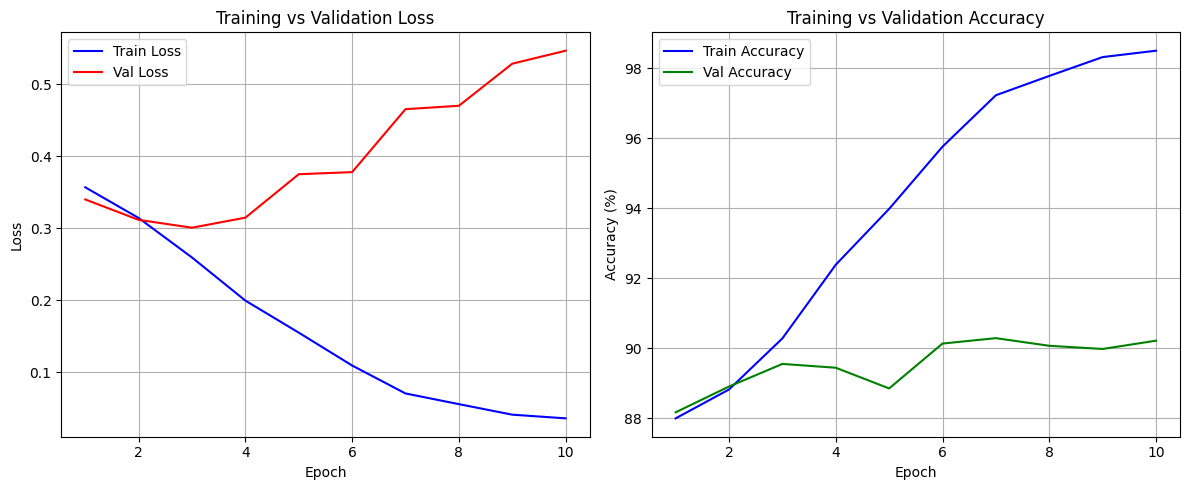

In [ ]:
import matplotlib.pyplot as plt

# =====================
# Plot Loss & Accuracy Curves
# =====================
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

# ----- Loss Curve -----
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# ----- Accuracy Curve -----
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'g-', label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

📈 Val Loss: 0.5463
✅ Val Acc: 90.22%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.924     0.968     0.946      9647
        real      0.654     0.430     0.519      1350

    accuracy                          0.902     10997
   macro avg      0.789     0.699     0.732     10997
weighted avg      0.891     0.902     0.893     10997



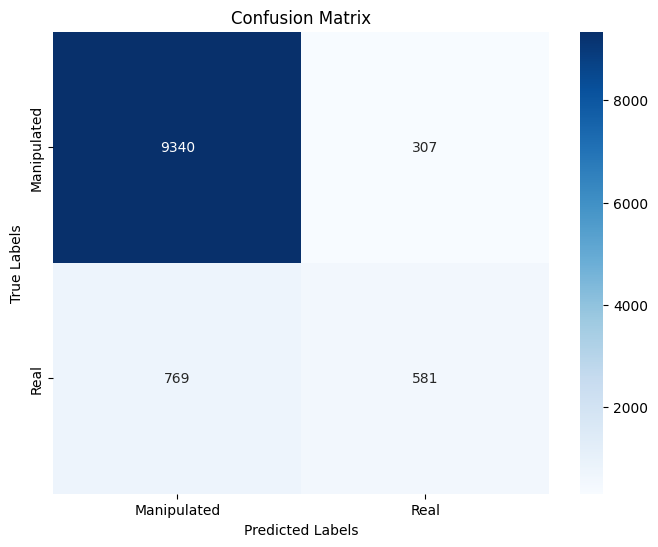

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Print Validation Loss and Accuracy
print(f"📈 Val Loss: {avg_val_loss:.4f}")
print(f"✅ Val Acc: {val_acc:.2f}%")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(
    [idx_to_class[i] for i in true_labels],
    [idx_to_class[i] for i in pred_labels],
    digits=3
))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Manipulated', 'Real'], yticklabels=['Manipulated', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

📈 Val Loss: 0.5463
✅ Val Acc: 90.22%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.924     0.968     0.946      9647
        real      0.654     0.430     0.519      1350

    accuracy                          0.902     10997
   macro avg      0.789     0.699     0.732     10997
weighted avg      0.891     0.902     0.893     10997



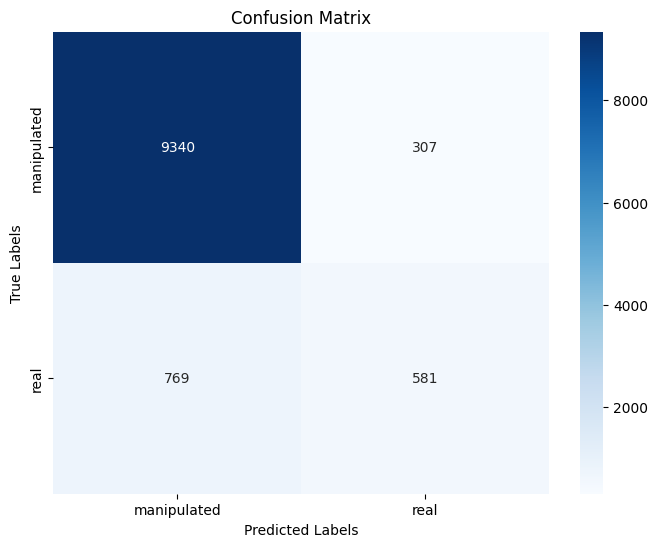

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Print Validation Loss and Accuracy
print(f"📈 Val Loss: {avg_val_loss:.4f}")
print(f"✅ Val Acc: {val_acc:.2f}%")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(
    [idx_to_class[i] for i in true_labels],
    [idx_to_class[i] for i in pred_labels],
    digits=3
))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Normalize (optional, for percentages)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Labels from idx_to_class
labels = [idx_to_class[i] for i in sorted(idx_to_class.keys())]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Real Time Test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import cv2
import timm
from tqdm import tqdm   # progress bar

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define image transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the trained model
model = timm.create_model('vit_large_patch16_224.orig_in21k', pretrained=False, num_classes=2)
model_path = '/content/drive/MyDrive/ModelTrain/DFD/checkpoints/best_model.pth'
model.load_state_dict(torch.load(model_path, map_location=device), strict=True)
model.to(device)
model.eval()

# Function to process the video and classify each frame with progress bar
def predict_video(video_path, model, transform, device, frame_skip=1):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # total frames in video
    frame_count = 0
    real_count = 0
    manipulated_count = 0

    # tqdm progress bar
    with tqdm(total=total_frames, desc="Processing Video", unit="frame") as pbar:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame_count += 1
            pbar.update(1)  # update progress bar

            # Optional: skip frames to speed up
            if frame_count % frame_skip != 0:
                continue

            # Convert frame to PIL Image and apply transformations
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

            # Make prediction
            with torch.no_grad():
                outputs = model(image)
                _, predicted = torch.max(outputs, 1)

            if predicted.item() == 0:
                manipulated_count += 1
            else:
                real_count += 1

    cap.release()

    # Final decision based on majority vote across all frames
    print(f"\nTotal Frames: {frame_count}")
    print(f"Detected Real: {real_count}, Detected Manipulated: {manipulated_count}")

    if real_count > manipulated_count:
        print(f"✅ Result: Real video")
        return "Real"
    else:
        print(f"⚠️ Result: Manipulated video")
        return "Manipulated"

In [ ]:
def predict_image(image_path, model, transform, device):
    # Open image
    image = Image.open(image_path).convert("RGB")

    # Apply transformations
    image = transform(image).unsqueeze(0).to(device)  # [1,3,224,224]

    # Predict
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    # Map class index to label
    class_names = {0: "Manipulated", 1: "Real"}
    label = class_names[predicted.item()]

    print(f"Prediction: {label}")
    return label

In [ ]:
# Test the video
video_path = '/content/drive/MyDrive/ModelTrain/DFD/Test/r.mp4'
result = predict_video(video_path, model, transform, device)

Processing Video: 100%|██████████| 1045/1045 [51:19<00:00,  2.95s/frame]


Total Frames: 1045
Detected Real: 31, Detected Manipulated: 1014
⚠️ Result: Manipulated video


In [ ]:
# Test the video
video_path = '/content/drive/MyDrive/ModelTrain/DFD/Test/f.mp4'
result = predict_video(video_path, model, transform, device)

Processing Video: 100%|██████████| 529/529 [26:02<00:00,  2.95s/frame]


Total Frames: 529
Detected Real: 8, Detected Manipulated: 521
⚠️ Result: Manipulated video


In [ ]:
img_path = "/content/sample_image.jpg"
result = predict_image(img_path, model, transform, device)